# Homework 5
### MODELADO DE DATOS CON REDES NEURONALES 
*Professor:* Michal Hemmerling \
*e-mail:* michal.hemmerling@udea.edu.co 

*Student:* Camilo José Torres Castaño \
*e-mail:* cjose.torres@udea.edu.co \
*C.c.* 1036401258


### Homework 5 (logistic regression)

Use scikit-learn to perform digit classification using data from Homework 2 (mnist_test.csv)

*we will compare it with Neural Network later


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
!ls

homework5_LogisticRegression.ipynb  mnist_test.csv  void


In [3]:
df = pd.read_csv('mnist_test.csv', sep = ',')

In [4]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Plot the data set ###

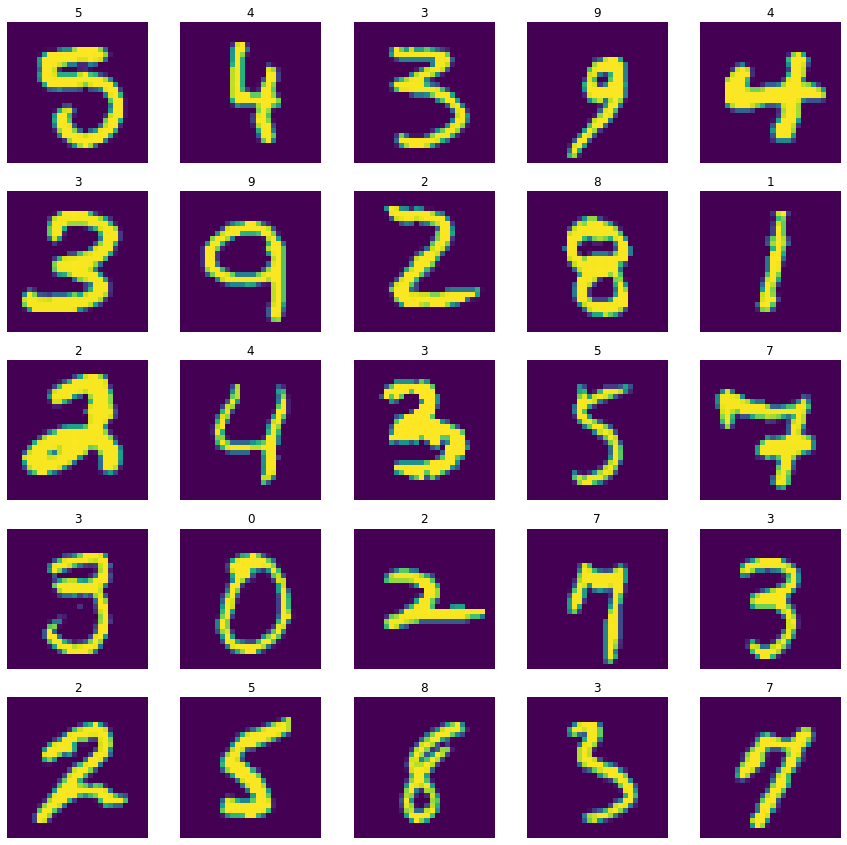

In [5]:
fig, ax = plt.subplots(5,5, figsize=(15,15))

for i in range(5):
    for j in range(5):
        rand = np.random.randint(df.shape[0]) # generate a random number between 0 and 9'999
        ax[i,j].imshow(np.reshape(df.iloc[rand][1:].to_numpy(), [28,28])) 
        ax[i,j].set_title(df.iloc[rand][0])
        ax[i,j].axis('off')

### Split the dataset into y_data and X_data

In [6]:
# y_data
y_data = df.loc[:, 'label']
y_data

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [7]:
#X_data
X_data = df.drop("label", inplace=True, axis=1) # Drop the first column
X_data = df.iloc[:df.shape[0],:] # Rearrange by rows
X_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print("X_data: ",X_data.shape, "X_data: ",y_data.shape)

X_data:  (10000, 784) X_data:  (10000,)


### Split the data into train and test using scikit-learn

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.2)

In [10]:
print("X_train: ",X_train.shape, "y_train: ",y_train.shape)
print("X_test:  ",X_test.shape, "y_test:  ",y_test.shape)

X_train:  (8000, 784) y_train:  (8000,)
X_test:   (2000, 784) y_test:   (2000,)


### Scale the data with the sklearn.preprocessing.StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scale
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Create a Logistic Regression Classifier Model

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=600)

### Fit the model

In [13]:
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on testing set:  {}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.0
Accuracy of Logistic regression classifier on testing set:  0.9045


### Predict the X_test data

In [14]:
y_predict = logreg.predict(X_test)
y_predict

array([5, 4, 7, ..., 2, 2, 9])

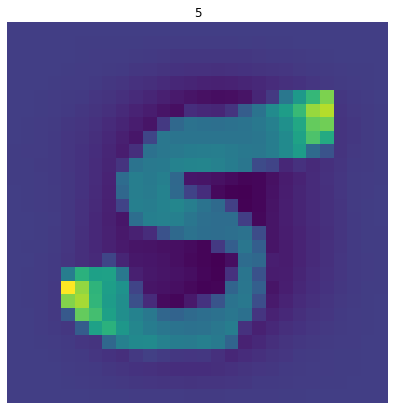

In [15]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.imshow(np.reshape(X_test[3], [28,28])) 
ax.set_title(y_predict[3])
ax.axis('off')
plt.show()

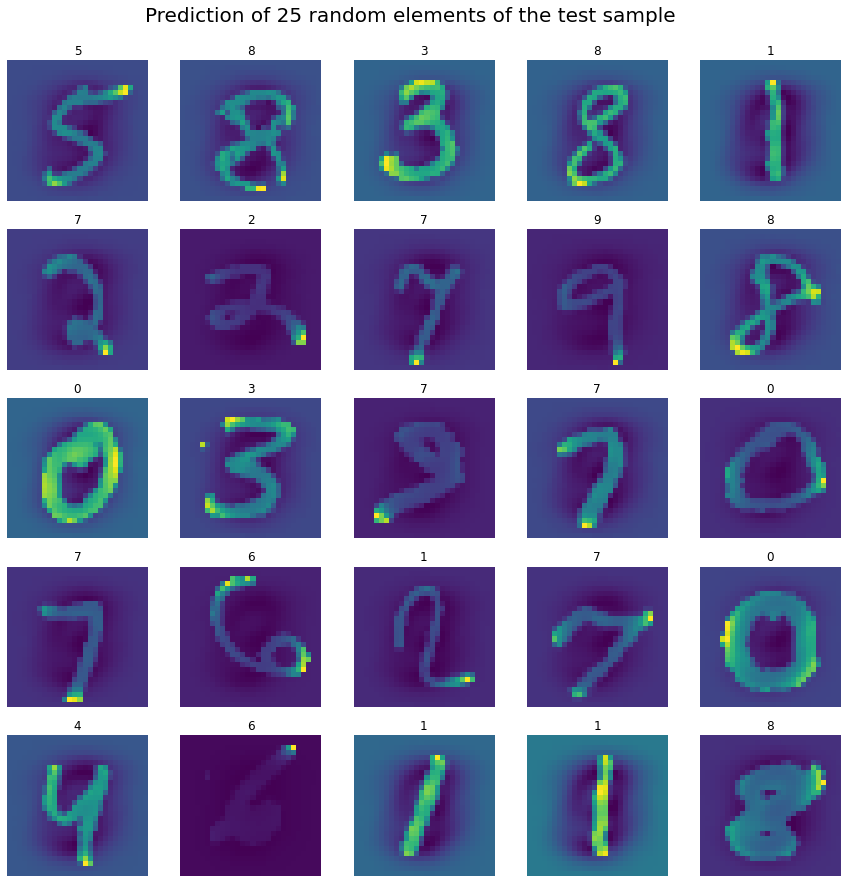

In [16]:
fig, ax = plt.subplots(5,5, figsize=(15,15))

fig.suptitle('Prediction of 25 random elements of the test sample', fontsize=20,y =0.93)

for i in range(5):
    for j in range(5):
        rand = np.random.randint(len(y_predict)) # generate a random number between 0 and 9'999
        ax[i,j].imshow(np.reshape(X_test[rand], [28,28])) 
        ax[i,j].set_title(y_predict[rand])
        ax[i,j].axis('off')